<a href="https://colab.research.google.com/github/FernandoBRdgz/diplomado_ds_mod4/blob/main/4.3%20Redes%20Neuronales%20Convolucionales/4.3.1%20Operaci%C3%B3n%20de%20Convoluci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
generation = "MOD4GEN<x>"

In [ ]:
image_path = f"/content/drive/MyDrive/{generation}/4.3 Redes Neuronales Convolucionales/img/points.png"

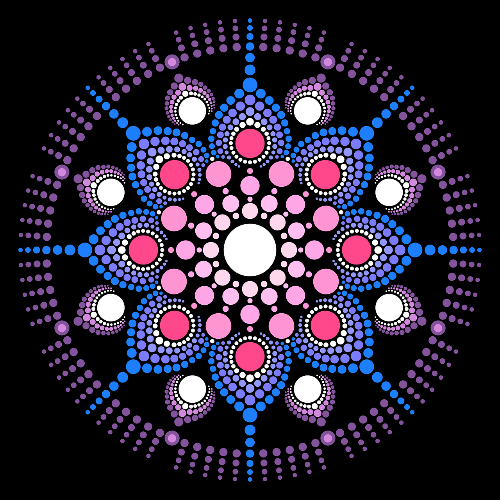

In [ ]:
image = cv2.imread(image_path)
image = cv2.resize(image, (500,500))
cv2_imshow(image)

In [ ]:
# filtro identidad
identity = np.array((
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]), dtype="int")

# filtro de desenfoque
blur = np.array((
    [1/16, 1/8, 1/16],
    [1/8, 1/4, 1/8],
    [1/16, 1/8, 1/16]), dtype="float")

# filtro de nitidez
sharpen = np.array((
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]), dtype="int")

# filtro Laplaciano (detección de bordes)
laplacian = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

# filtro Sobel eje x
sobel_x = np.array((
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]), dtype="int")

# filtro Sobel eje y
sobel_y = np.array((
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]), dtype="int")

In [ ]:
filters = (
    ("identidad", identity),
    ("desenfoque", blur),
    ("nitidez", sharpen),
    ("sobel_x", sobel_y),
    ("sobel_y", sobel_x),
    ("laplaciano", laplacian),
)


[INFO] Aplicando el filtro identidad


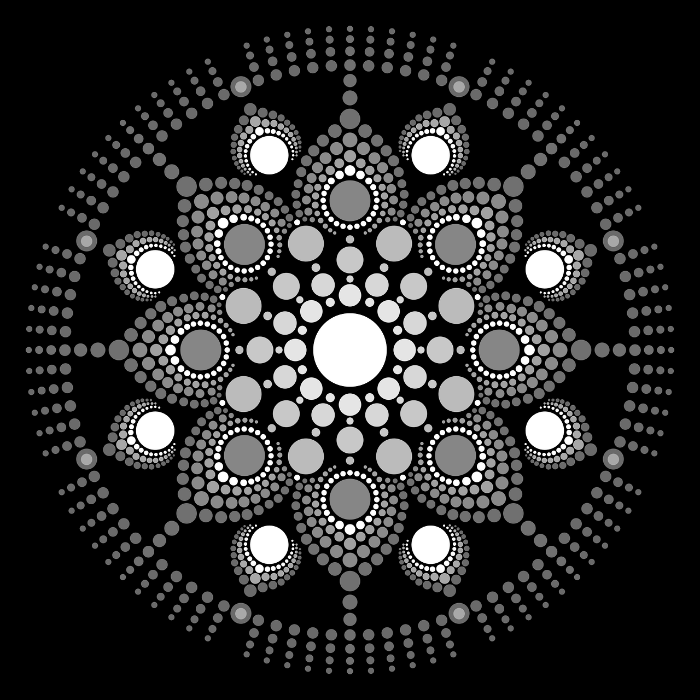


[INFO] Aplicando el filtro desenfoque


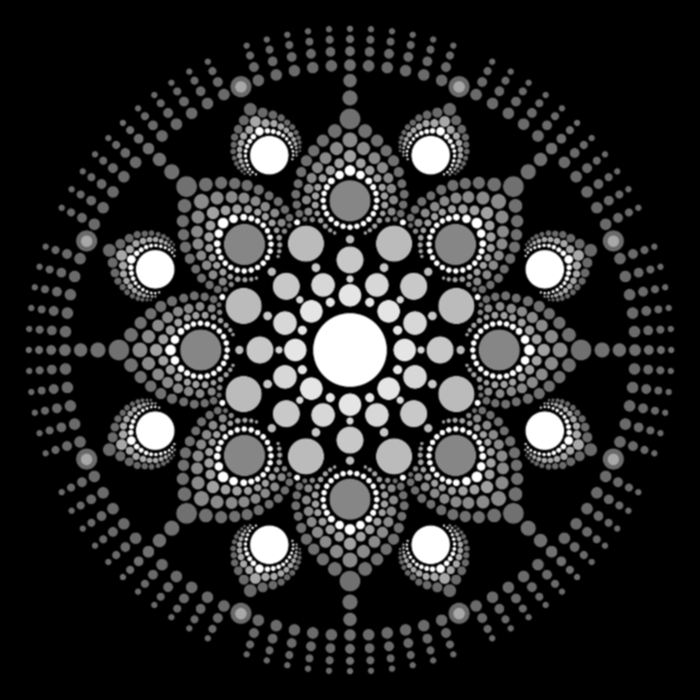


[INFO] Aplicando el filtro nitidez


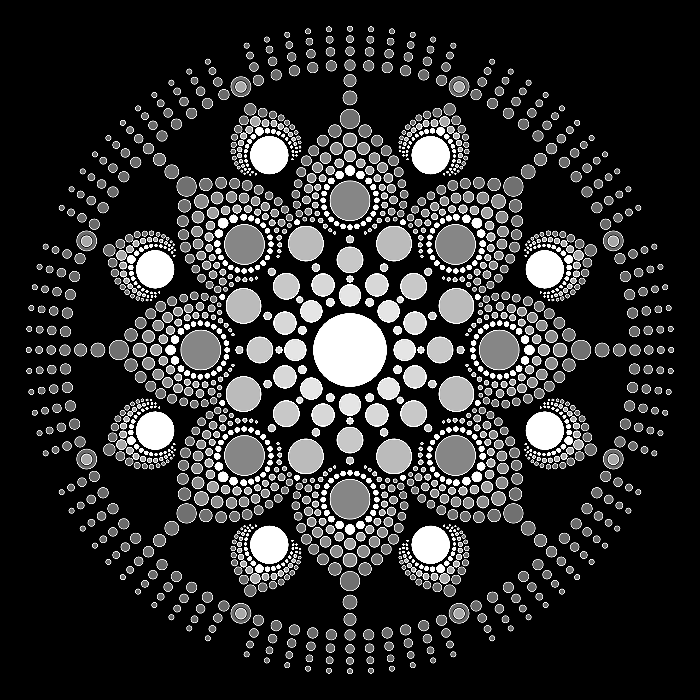


[INFO] Aplicando el filtro sobel_x


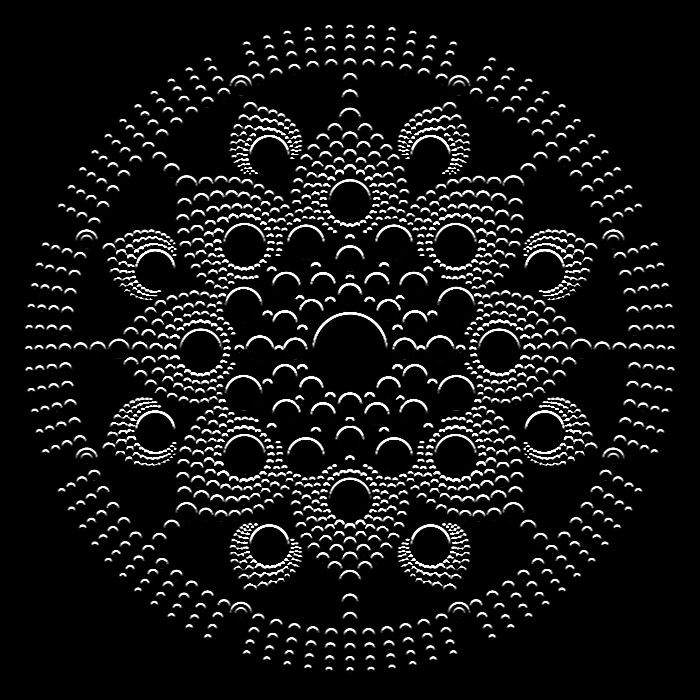


[INFO] Aplicando el filtro sobel_y


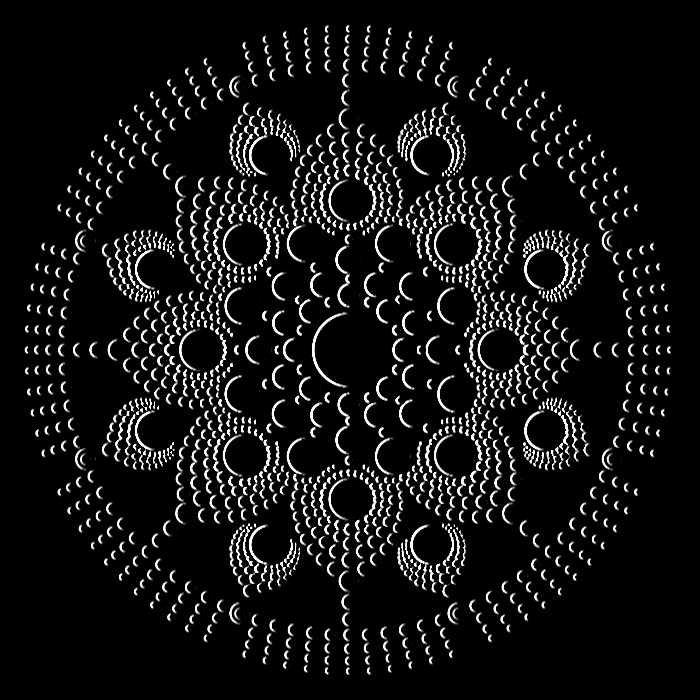


[INFO] Aplicando el filtro laplaciano


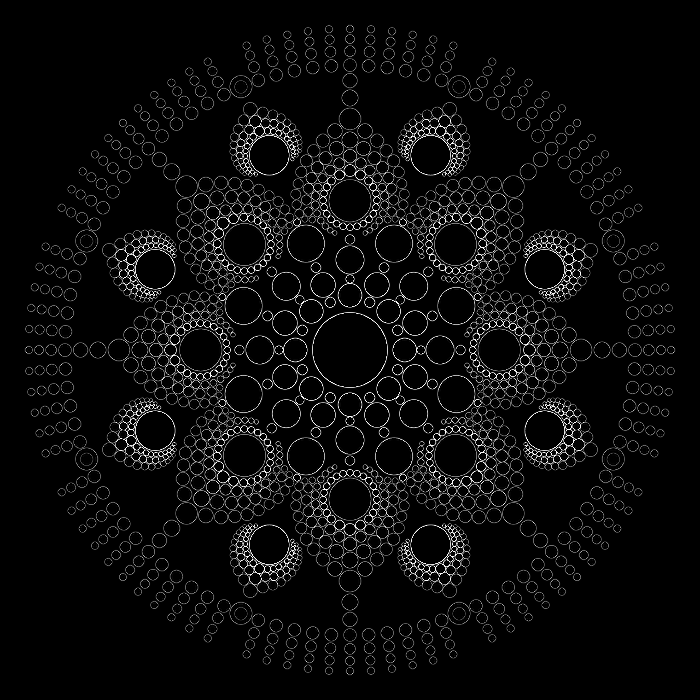

In [ ]:
# Lectura de la imagen de entrada y conversión a escala de grises
image = cv2.imread(image_path)
image = cv2.resize(image, (700,700))
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

for (filter_name, filter) in filters:
    # Aplica la operación de convolución a la imagen usando la función `filter2D`

    print("\n[INFO] Aplicando el filtro {}".format(filter_name))
    conv_img = cv2.filter2D(src=gray_img, ddepth=-1, kernel=filter)
    """
    src: la imagen de origen sobre la que aplicar el filtro
    ddepth: es la profundidad deseable de la imagen de destino. El valor -1 representa que la imagen resultante tendrá la misma profundidad que la imagen de origen
    kernel: es la matriz del filtro aplicada sobre la imagen
    """

    # Muestra la imagen de salida
    cv2_imshow(conv_img)

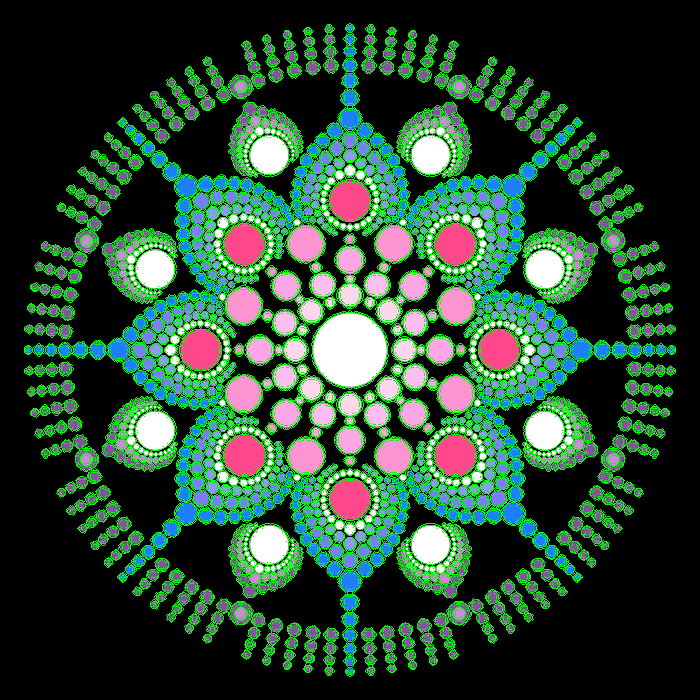

In [ ]:
# Encuentra contornos en la imagen
contours, hierarchy = cv2.findContours(conv_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filtra solo aquellos contornos que no tienen contorno hijo.
#contours = [contours[i] for i in range(len(contours)) if hierarchy[0][i][2] == -1]

# Dibuja contornos sobre la imagen original
img = cv2.drawContours(image, contours, -1, (0, 255, 0), 1)

# Visualiza la imagen y sus contornos
cv2_imshow(img)

In [ ]:
type(contours)

tuple

In [ ]:
# Conteo final de círculos en la imagen
len(contours)

7317